<a href="https://colab.research.google.com/github/Rayers-Ranjitkar/Rayers_AI_Worksheets/blob/main/Worksheet2_Pandas_Rayers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.1**

**Problem 1: Problem 1- Data Read, Write and Inspect:**

In [78]:
import pandas as pd


bank_df = pd.read_csv('/content/drive/MyDrive/Dataset/Workshop2/bank.csv')
#bank_df.head()
#bank_df.info()

#a. columns with dtypes=object
specific_obj_df = bank_df.select_dtypes(include='object') #select_dtypes() is a pandas DataFrame method used to select columns based on their data type.
print("specific_obj_df:")
print()
print(specific_obj_df)
print()
print("-"*100)
print()

#b. unique values
for each_col in specific_obj_df.columns: #.columns is a DataFrame attribute that gives all column names as a pandas Index object i.e. Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month'], dtype='object')
  print(f"Unique values in column named: {each_col} ")
  print(f"Total count of unique values = {specific_obj_df[each_col].nunique()}")#specific_obj_df[each_col] = selects the column as a Series and nunique() counts the number of unique data in that col and returns it
  print(f"values: {specific_obj_df[each_col].unique()}")#.unique() = returns a NumPy array of all unique values in that column.

  #c. total number of null values in the column
  print(f"Total number of null values = {specific_obj_df[each_col].isnull().sum()}") #.isnull() → returns a boolean Series: True if value is NaN/null, False otherwise and .sum() → counts the number of True values → i.e., number of nulls.
  print()

print("-"*100)
#3. Drop all the cols with dtype 'obj' and write write the DataFrame in ”.csv” with name ”banknumericdata.csv”
dropped_obj_df = bank_df.select_dtypes(exclude = 'object')
print(f"Dropped_obj_df.................. \n: {dropped_obj_df}")
print("-"*100)
print()

#writing data to csv
dropped_obj_df.to_csv('/content/drive/MyDrive/Dataset/Workshop2/banknumericdata.csv', index=True) #creates new file and stores there, .to_csv converts our df to csv for storing purposes


#4. Read ”banknumericdata.csv” and Find the summary statistics.
new_bank_df = pd.read_csv('/content/drive/MyDrive/Dataset/Workshop2/banknumericdata.csv')

print(f"Reading banknumericdata.csv........")
print()
print(new_bank_df)
print(f"Summary Statistics: \n {new_bank_df.describe() }")



specific_obj_df:

                job   marital  education default housing loan    contact  \
0        management   married   tertiary      no     yes   no    unknown   
1        technician    single  secondary      no     yes   no    unknown   
2      entrepreneur   married  secondary      no     yes  yes    unknown   
3       blue-collar   married    unknown      no     yes   no    unknown   
4           unknown    single    unknown      no      no   no    unknown   
...             ...       ...        ...     ...     ...  ...        ...   
45206    technician   married   tertiary      no      no   no   cellular   
45207       retired  divorced    primary      no      no   no   cellular   
45208       retired   married  secondary      no      no   no   cellular   
45209   blue-collar   married  secondary      no      no   no  telephone   
45210  entrepreneur   married  secondary      no      no   no   cellular   

      month poutcome    y  
0       may  unknown   no  
1       may  

**Problem 2- Data Imputations:**

In [74]:
import pandas as pd

#1
medical_stud_df = pd.read_csv('/content/drive/MyDrive/Dataset/Workshop2/medical_students_dataset.csv');
#medical_stud_df.head()
#medical_stud_df.info()

for each_col in medical_stud_df.columns:
  if(medical_stud_df[each_col].isnull().sum() > 0):
      print(f"Null values found in col: {each_col}")
      print(f"Total number of Null values found = {medical_stud_df[each_col].isnull().sum()}")
      print()

print('-'*100)

#3 . For the column with missing values fill the values using various techniques we discussed above. Try to explain why did you select the particular methods for particular column.
print()
print("Techniques used to fill the columns:")
print()

int_medical_df = medical_stud_df.select_dtypes(exclude='object')
for each_col in int_medical_df:
    Q1 = int_medical_df[each_col].quantile(0.25)
    Q3 = int_medical_df[each_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = int_medical_df[(int_medical_df[each_col] < lower_bound) | (int_medical_df[each_col] > upper_bound)] #medical_stud_df[each_col]->Returns a pandas Series of all values in column and medical_stud_df[col] < lower_bound returns Returns a boolean Series: True where the value is below lower_bound, False elsewhere.

    if len(outliers) > 0:
      print(f"Outliers found in col: {each_col}")
      print(f"Use: Median")
    else:
      print(f"Outliers Not found in col: {each_col}")
      print(f"Use: Mean")

    print()

# Since, (Gender, Blood Type, Diabetes, Smoking) are qualitative data, they cannot have mean/median.
#Therefore, for these columns I would use Mode (the highest repeated frequency) to fill the values of these column.
print("# Since, (Gender, Blood Type, Diabetes, Smoking) are qualitative data, they cannot have mean/median. \n Therefore, for these columns I would use Mode (the highest repeated frequency) to fill the values of these column. ")

print('-'*100)

#4 Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.

#checking for duplicate row data
duplicate_rows =  medical_stud_df.duplicated() #medical_stud_df.duplicated() returns a boolean Series of length = number of rows. True → the row is a duplicate of a previous row. False → the row is unique so far.
total_duplicates_sum = medical_stud_df.duplicated().sum()
print()
print(f"Total number of duplicate rows: {total_duplicates_sum}")

# Dropped the dupilcated rows
medical_stud_unique = medical_stud_df.drop_duplicates(keep='first')
print(f"Total duplicates dropped: {len(medical_stud_df) - len(medical_stud_unique)}")



Null values found in col: Student ID
Total number of Null values found = 20000

Null values found in col: Age
Total number of Null values found = 20000

Null values found in col: Gender
Total number of Null values found = 20000

Null values found in col: Height
Total number of Null values found = 20000

Null values found in col: Weight
Total number of Null values found = 20000

Null values found in col: Blood Type
Total number of Null values found = 20000

Null values found in col: BMI
Total number of Null values found = 20000

Null values found in col: Temperature
Total number of Null values found = 20000

Null values found in col: Heart Rate
Total number of Null values found = 20000

Null values found in col: Blood Pressure
Total number of Null values found = 20000

Null values found in col: Cholesterol
Total number of Null values found = 20000

Null values found in col: Diabetes
Total number of Null values found = 20000

Null values found in col: Smoking
Total number of Null values 

# **3.2 Exercises- Data Cleaning and Transformations**

**Problem-1**

In [93]:
import pandas as pd

#Problem 1..................................

titanic_df = pd.read_csv('/content/drive/MyDrive/Dataset/Workshop2/Titanic-Dataset.csv')
# titanic_df.head()

specific_df_cols = titanic_df[['Name','Pclass','Sex','Age','Fare','Survived']]
pclass_rows = specific_df_cols[specific_df_cols['Pclass'] == 1]#specific_df_col['Pclass'] == 1  --->  Creates a boolean Series of length = total rows. and specific_df_cols [series] compares each data in the series with it's own data and returns the rows which are only true
#print(specific_df_cols)

print("Printing pclass_rows with pClass as 1....")
print(pclass_rows)
print()
print("-"*100)

fare_col = specific_df_cols[['Fare']]
#print(fare_col)
print("Printing fare_col details....")
print(fare_col.describe())
print()
print("-"*100)
print()



#Problem 2............  How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found this out, drop them from your DataFrame.
age_col = specific_df_cols['Age']
total_null_age = age_col.isnull().sum()
print(f"Total null values in Age column = {total_null_age}")

#Dropping the rows where age = null
new_Dropped_df = specific_df_cols.dropna(subset=['Age']) #subset=[<column_list>] → Only check these columns for NaN, If a row has NaN in any of these columns, that row will be dropped.
print(f"All Null values dropped....")
print(f"Total null values in Age column = {new_Dropped_df['Age'].isnull().sum()}")



Printing pclass_rows with pClass as 1....
                                                  Name  Pclass     Sex   Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                              McCarthy, Mr. Timothy J       1    male  54.0   
11                            Bonnell, Miss. Elizabeth       1  female  58.0   
23                        Sloper, Mr. William Thompson       1    male  28.0   
..                                                 ...     ...     ...   ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)       1  female  47.0   
872                           Carlsson, Mr. Frans Olof       1    male  33.0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)       1  female  56.0   
887                       Graham, Miss. Margaret Edith       1  female  19.0   
889                              Behr, Mr. Karl Howell       1    male  26.0  

**Problem-3**

In [101]:
import pandas as pd

titanic_df = pd.read_csv('/content/drive/MyDrive/Dataset/Workshop2/Titanic-Dataset.csv')
#titanic_df.head(10)


# 1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’ ’Embarked Q’, ’Embarked S’).
one_hot_encoding = pd.get_dummies(titanic_df['Embarked'],prefix='Embarked') #pd.get_dummies() is a pandas function that converts a categorical column into one-hot encoded columns. It scans the Series and finds all unique categories. In this case: 'C', 'Q', 'S' and It creates new columns for each unique value. The prefix argument adds a name prefix to the new columns.
#print(one_hot_encoding)

#2. Add these new columns to the original DataFrame.
titanic_df = pd.concat([titanic_df,one_hot_encoding],axis=1)
#print(titanic_df)

#3. Drop the original ’Embarked’ column.
new_titanic_df =titanic_df.drop('Embarked',axis=1) # axis=1 → drop a column , inplace=false by default so, it does not modify titanic_df itself and It returns a new DataFrame with the column removed.

#4. Print the first few rows of the modified DataFrame to verify the changes.
new_titanic_df.head(7)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,False,True,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,False,False,True


**Problem-4**

Mean survival rate for males:0.19 
Mean survival rate for females:0.74 
----------------------------------------------------------------------------------------------------


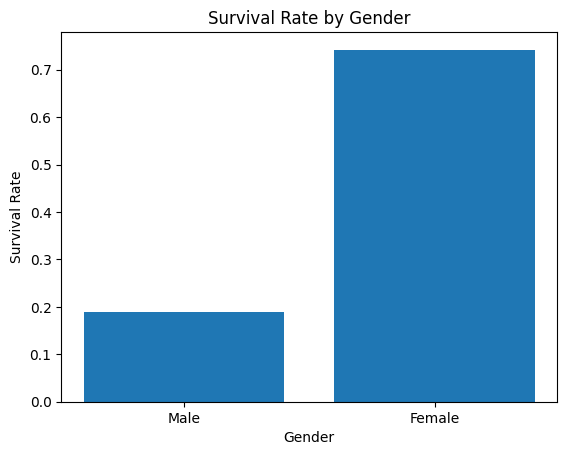

In [108]:
# Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column.

import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('/content/drive/MyDrive/Dataset/Workshop2/Titanic-Dataset.csv')
#titanic_df.head(10)

male_passengers = titanic_df[titanic_df['Sex'] == 'male']
female_passengers = titanic_df[titanic_df['Sex'] == 'female']
male_survive_rate = male_passengers['Survived'].mean();
female_survive_rate = female_passengers['Survived'].mean();

print(f"Mean survival rate for males:{male_survive_rate:.2f} ")
print(f"Mean survival rate for females:{female_survive_rate:.2f} ")

print("-"*100)

# Labels and values
labels = ['Male', 'Female']
values = [male_survive_rate, female_survive_rate]

plt.bar(labels, values)

plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")

plt.show()




**Problem-5**

Survival rate (C): 0.55
Survival rate (Q): 0.39
Survival rate (S): 0.34
----------------------------------------------------------------------------------------------------


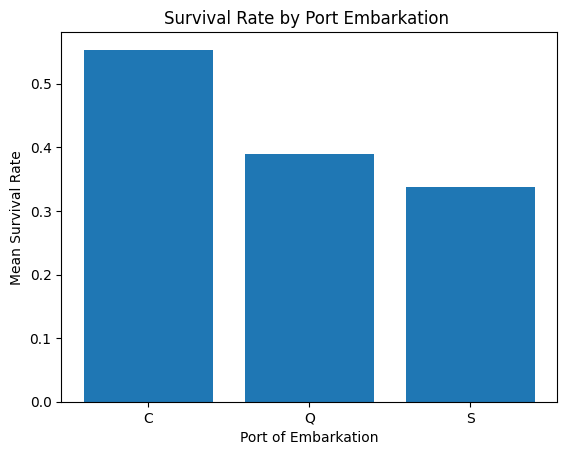

In [113]:
#Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Embarked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('/content/drive/MyDrive/Dataset/Workshop2/Titanic-Dataset.csv')
#titanic_df.head(10)

#Making a small cols table as per our need
embarkedPort_survived_df = titanic_df[['Embarked','Survived']];
#Separating data as per the ports into a new df
port_c_df = embarkedPort_survived_df[embarkedPort_survived_df['Embarked'] == "C"]
port_s_df = embarkedPort_survived_df[embarkedPort_survived_df['Embarked'] == "S"]
port_q_df = embarkedPort_survived_df[embarkedPort_survived_df['Embarked'] == "Q"]
#Calculating the survive rates
c_survive_rate = port_c_df['Survived'].mean()
s_survive_rate = port_s_df['Survived'].mean()
q_survive_rate = port_q_df['Survived'].mean()

print(f"Survival rate (C): {c_survive_rate:.2f}")
print(f"Survival rate (Q): {q_survive_rate:.2f}")
print(f"Survival rate (S): {s_survive_rate:.2f}")

print("-"*100)

#plotting bar-garph
labels = ['C', 'Q', 'S']
values = [c_survive_rate, q_survive_rate, s_survive_rate]

plt.bar(labels, values)
plt.xlabel("Port of Embarkation")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Port Embarkation ")
plt.show()


